Notebook to visualize how various calibrations compare.

In [1]:
import numpy as np

import pickle

from corner import corner

from matplotlib.patches import Patch

# Calibrations to compare

In [2]:
# "Version 9" calibration
temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_KAD-20250523.pickle', 'rb')
cov_ab1, tfr_samples1, V01 = pickle.load(temp_infile)
temp_infile.close()

In [3]:
# "Version 9" calibration w/o one of the two overlapping clusters
temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony_weightsVmax-1_dVsys_noOverlaps_KAD-20250605.pickle', 'rb')
cov_ab2, tfr_samples2, V02 = pickle.load(temp_infile)
temp_infile.close()

# Compare calibrations

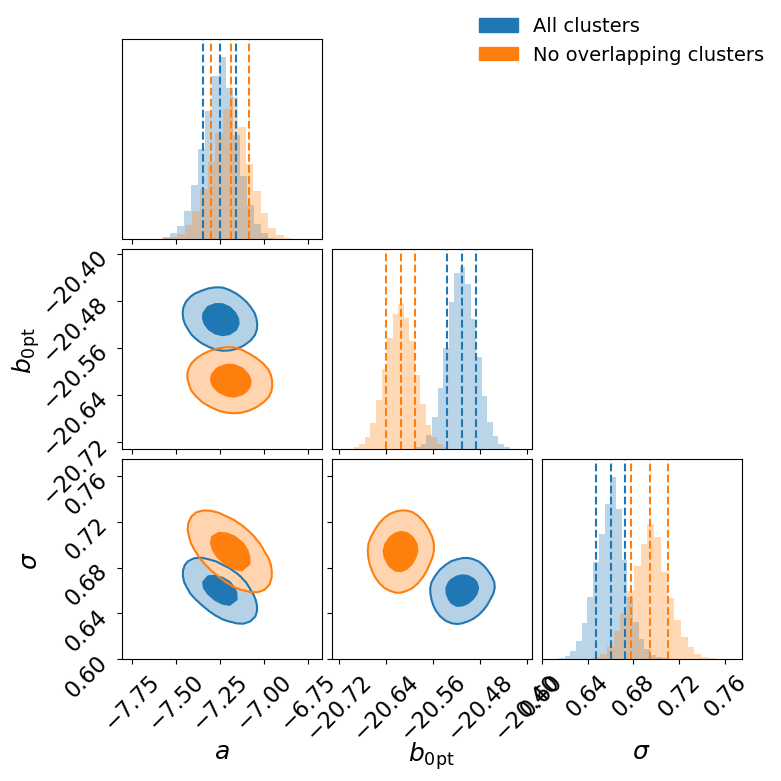

In [4]:
labels = ['$a$', '$b_{0\mathrm{pt}}$', r'$\sigma$']

param_indices1 = [0, 1, tfr_samples1.T.shape[1] - 1]
param_indices2 = [0, 1, tfr_samples2.T.shape[1] - 1]

fig = corner(tfr_samples1.T[:, param_indices1], 
             bins=25, 
             smooth=1, 
             labels=labels, 
             label_kwargs={'fontsize':18}, 
             labelpad=0.1, 
             levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
             quantiles=[0.16, 0.5, 0.84], 
             color='tab:blue', 
             hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
             plot_datapoints=False, 
             fill_contours=True, 
             show_titles=False, 
             title_kwargs={'fontsize':18, 'loc':'left', 'pad':10}
            )

corner(tfr_samples2.T[:, param_indices2], 
       fig=fig, 
       bins=25, 
       smooth=1, 
       levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
       quantiles=[0.16, 0.5, 0.84], 
       color='tab:orange', 
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3}, 
       plot_datapoints=False, 
       fill_contours=True
      )

for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=16)

# Create custom legend handles
legend_handles = [Patch(color='tab:blue', label='All clusters'), 
                  Patch(color='tab:orange', label='No overlapping clusters')
                 ]

fig.legend(handles=legend_handles, loc='upper right', fontsize=14, frameon=False);